In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import datetime
import chardet
import time
from pandas.api.types import is_number
from matplotlib import pyplot as plt
import dask.dataframe as dd
import datetime
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
def calcular():
    # Mediana
    mediana = statistics.median(results)
    print("Mediana: ", mediana)

    # Média
    media = statistics.mean(results)
    print("Média: ", media)

    # Desvio padrão
    desvio_padrao = statistics.stdev(results)
    print("Desvio padrão: ", desvio_padrao)

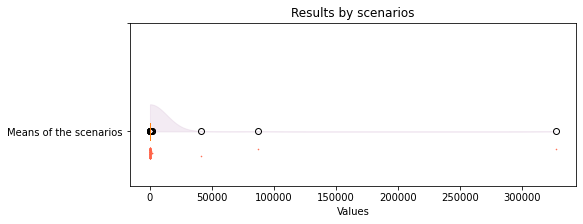

Mediana: 9.55
Média: 4571.34
Desvio padrão: 33832.95


In [140]:
fig, ax = plt.subplots(figsize=(8, 3))

data_x = [results]

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3), ['Means of the scenarios'])  # Set text labels.
plt.xlabel('Values')
plt.title("Results by scenarios")
plt.show()
calcular()

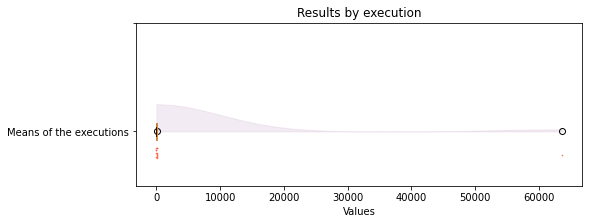

Mediana: 30.64
Média: 4571.34
Desvio padrão: 17004.04


In [131]:
fig, ax = plt.subplots(figsize=(8, 3))

data_x = [results]

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3), ['Means of the executions'])  # Set text labels.
plt.xlabel('Values')
plt.title("Results by execution")
plt.show()
calcular()

In [23]:
#Carregando os dez arquivos


arquivos_csv = [str('resultTime-'+str(i+1)+'.csv') for i in range(10)]

dataframes = []

for arquivo in arquivos_csv:
    print(arquivo)
    df = pd.read_csv(arquivo, sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
    dataframes.append(df)

resultTime-1.csv
resultTime-2.csv
resultTime-3.csv
resultTime-4.csv
resultTime-5.csv
resultTime-6.csv
resultTime-7.csv
resultTime-8.csv
resultTime-9.csv
resultTime-10.csv


In [139]:
#Retorna a soma de cada linha dos 10 arquivos
media_linha = []
num_linhas = dataframes[0].shape[0]
print(num_linhas)
for j in range(num_linhas):
    soma = 0
    for i in range(10):
        # print(dataframes[i].iloc[j].sum())
        soma = soma + dataframes[i].iloc[j].sum()
    media_linha.append(soma/14)
    print("Acabou a linha", j+1, "média:", soma/14)

print(media_linha)
results = media_linha

101
Acabou a linha 1 média: 9.799285714285713
Acabou a linha 2 média: 9.615714285714287
Acabou a linha 3 média: 495.72785714285726
Acabou a linha 4 média: 10.481428571428575
Acabou a linha 5 média: 12.496428571428572
Acabou a linha 6 média: 7.727142857142856
Acabou a linha 7 média: 7.010714285714285
Acabou a linha 8 média: 6.98857142857143
Acabou a linha 9 média: 6.714999999999998
Acabou a linha 10 média: 7.114285714285716
Acabou a linha 11 média: 7.489285714285714
Acabou a linha 12 média: 7.700714285714288
Acabou a linha 13 média: 13.691428571428574
Acabou a linha 14 média: 8.566428571428572
Acabou a linha 15 média: 11.098571428571429
Acabou a linha 16 média: 8.559999999999999
Acabou a linha 17 média: 8.874999999999998
Acabou a linha 18 média: 8.593571428571432
Acabou a linha 19 média: 8.372857142857141
Acabou a linha 20 média: 15.073571428571432
Acabou a linha 21 média: 18.314999999999998
Acabou a linha 22 média: 14.740714285714287
Acabou a linha 23 média: 7.985
Acabou a linha 24 méd

In [137]:
total = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 13:0}
num_linhas = dataframes[0].shape[0]

for i in range(10):
    dframe = dataframes[i]
    cont = 0
    for c in dframe.columns:
        total[cont] = total[cont] + dframe[c].sum()
        cont = cont + 1

    print("Terminou dataframe", i)
results = []
#calculando a média
for i in total.values():
    results.append(i/num_linhas)

# results.pop(5)
print(results)




Terminou dataframe 0
Terminou dataframe 1
Terminou dataframe 2
Terminou dataframe 3
Terminou dataframe 4
Terminou dataframe 5
Terminou dataframe 6
Terminou dataframe 7
Terminou dataframe 8
Terminou dataframe 9
[31.630099009900984, 13.446336633663368, 21.983861386138614, 5.899405940594061, 31.574059405940595, 63650.10306930694, 30.91831683168317, 43.111584158415845, 30.017029702970294, 57.35138613861385, 31.098712871287145, 10.9109900990099, 30.353465346534655, 10.425049504950499]
